import time
print(time.time())

In [2]:
import math
def pow(x,y):
    return (x**y)


In [3]:
n = pow(2,3)
print(n)

8


In [26]:
import math
class Main(object):
    def __init__(self, x=None, y=None):
        self.x = x
        self.y = y
        
    def function(self):
        print("You have been put the first number:%d" % self.x)
        print("Then you put the second number:%d" % self.y)
        return math.pow(self.x, self.y)

In [22]:
fun = Main(2,3)
print(fun)

In [23]:
fun

In [24]:
fun.function()

You have been put the first number:2
Then you put the second number:3


8.0

In [25]:
from mayavi import malb

ModuleNotFoundError: No module named 'mayavi'

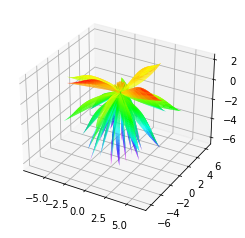

In [28]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure()
ax = fig.gca(projection='3d')
[x, t] = np.meshgrid(np.array(range(25))/24.0, np.arange(0, 575.5, 0.5)/575*17*np.pi - 2*np.pi)
p = (np.pi/2)*np.exp(-t/(8*np.pi))
u = 1 - (np.mod(3.6*t, 2*np.pi)/np.pi)**4/2
y = 2*(x**2 - x)**2*np.sin(p)
r = u*(x*np.sin(p) + y*np.cos(p))
surf = ax.plot_surface(r*np.cos(t), r*np.sin(t), u*(x*np.cos(p) - y*np.sin(p)), rstride=1, cstride=1, cmap=cm.gist_rainbow_r,
                      linewidth=0, antialiased=True)
plt.show()

In [29]:
exit()

In [1]:
print("Command as follow!!!")

Command as follow!!!
